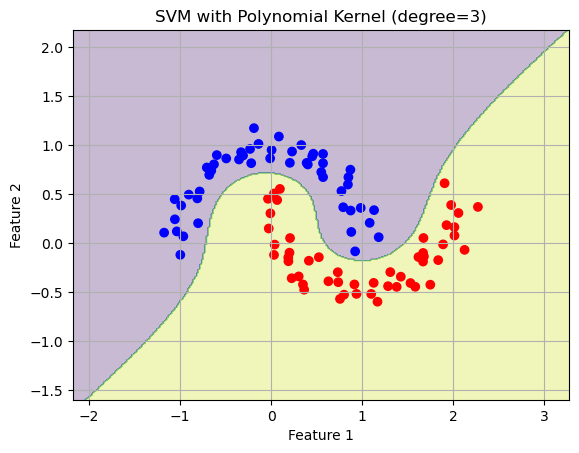

In [2]:
# Polynomial Kernel SVM

# 🔹 Step 1: Import tools
from sklearn.datasets import make_moons     # Make curved moon-shaped data
from sklearn.preprocessing import StandardScaler  # Scale the features
from sklearn.pipeline import Pipeline        # Chain steps together
from sklearn.svm import SVC                  # The SVM model
import matplotlib.pyplot as plt              # For plotting graphs
import numpy as np                           # For math

# 🔹 Step 2: Create fake curvy data (2 moons shape)
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# 🔹 Step 3: Create SVM Pipeline with Polynomial Kernel
poly_svm_clf = Pipeline([
    ("scaler", StandardScaler()),                  # Step 1: Scale everything
    ("svm_clf", SVC(kernel="poly", degree=3,       # Step 2: Use poly kernel
                    coef0=1, C=5))                 # Extra control & softness
])


# 🔹 Step 4: Train the model
poly_svm_clf.fit(X, y)


# 🔹 Step 5: Plotting function
def plot_decision_boundary(model, X, y):
    # Create a big grid of test points to visualize
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Predict every point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Draw colored regions (decision zones)
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title("SVM with Polynomial Kernel (degree=3)")
    plt.xlabel("Feature 1")    
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()


# 🔹 Step 6: Call the function to see it visually
plot_decision_boundary(poly_svm_clf, X, y)


[1]


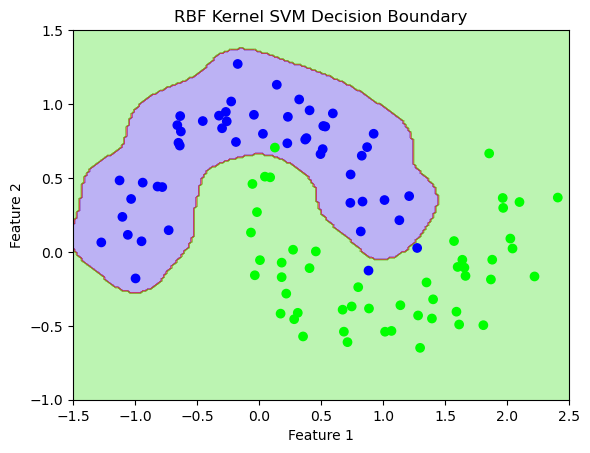

In [7]:
# Gaussian RBF Kernel

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Make a nonlinear dataset (like two half moons)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Create a pipeline with StandardScaler and RBF-kernel SVM
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=8, C=0.01))  # Key hyperparams here!
])

# Train the model
rbf_kernel_svm_clf.fit(X, y)

# Predict a new sample (optional)
print(rbf_kernel_svm_clf.predict([[1, 1]]))

# Helper function to plot decision boundaries
import numpy as np

def plot_decision_boundary(clf, X, y):
    x0s = np.linspace(-1.5, 2.5, 200)
    x1s = np.linspace(-1.0, 1.5, 200)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("RBF Kernel SVM Decision Boundary")
    plt.show()

# Plot the boundary
plot_decision_boundary(rbf_kernel_svm_clf, X, y)



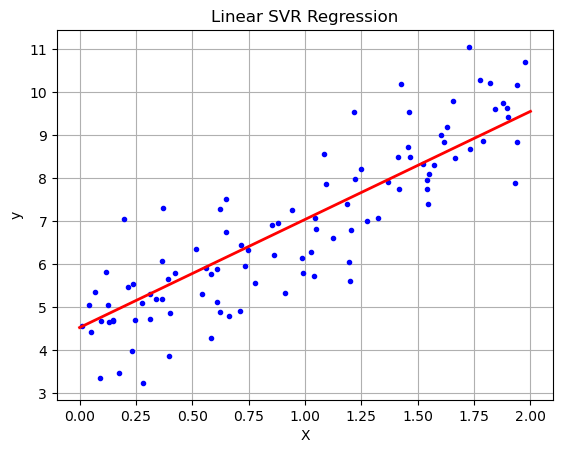

In [8]:
# Linear SVR
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Create fake linear data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# Create pipeline: scale + SVR
svr_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="linear", C=1, epsilon=1.5))
])

# Train the model
svr_reg.fit(X, y)

# Predict some values
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = svr_reg.predict(X_new)

# Plot
plt.plot(X, y, "b.")
plt.plot(X_new, y_pred, "r-", linewidth=2)
plt.title("Linear SVR Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


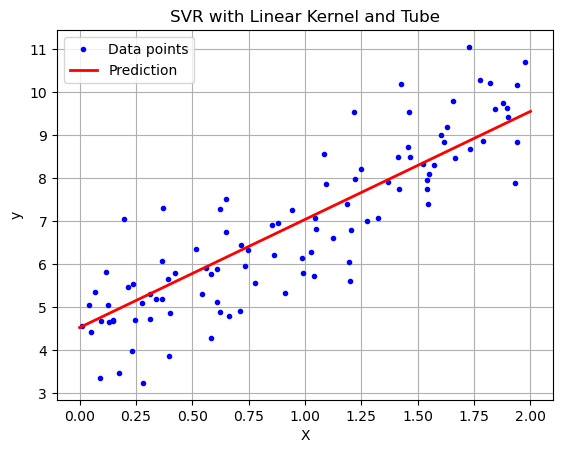

In [9]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Create fake linear-ish data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# SVR with epsilon=1.5
svr_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="linear", C=1, epsilon=1.5))
])

svr_reg.fit(X, y)

# Predict
X_new = np.linspace(0, 2, 100).reshape(100, 1)
y_pred = svr_reg.predict(X_new)

# Plot
plt.plot(X, y, "b.", label="Data points")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Prediction")
plt.title("SVR with Linear Kernel and Tube")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

